### 1.pytorch tensor

#### 1.1将tensor作为索引

In [1]:
import torch as t

In [2]:
x=t.rand(3,2)

In [3]:
x

tensor([[0.5412, 0.4741],
        [0.7179, 0.1429],
        [0.3277, 0.1108]])

In [4]:
#index.size():(3,2)
index=t.Tensor([[0,1],[1,0],[0,0]]).type(t.uint8)

In [5]:
#返回的值是x中不为0的位置的值，并且是一维的数据
x[index]

tensor([0.4741, 0.7179])

In [6]:
idx=t.LongTensor([0,1,0,0])

In [7]:
x[idx]

tensor([[0.5412, 0.4741],
        [0.7179, 0.1429],
        [0.5412, 0.4741],
        [0.5412, 0.4741]])

#### 1.2 torch.gather

In [9]:
b=t.Tensor([[1,2,3],[4,5,6]])

In [10]:
b

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [22]:
index1=t.LongTensor([[0,1],[2,0]])
index2 = t.LongTensor([[0,1,1],[0,0,0]])

In [23]:
#当dim=1的时候，在b中每一行按index1中的数字作为列取值，索引后的size与index1相同
t.gather(b,dim=1,index=index1)

tensor([[1., 2.],
        [6., 4.]])

In [24]:
t.gather(b,dim=1,index=index2)

tensor([[1., 2., 2.],
        [4., 4., 4.]])

In [31]:
#两者等同
b.data.max(),b.max()

(tensor(6.), tensor(6.))

In [32]:
b+b.max()

tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])

#### 1.3.torch.sort()

[使用两次sort函数（排序）找出矩阵每个元素在升序或降序排列中的位置](https://blog.csdn.net/LXX516/article/details/78804884)

#### 1.4.torch.clamp

In [39]:
num_pos=t.Tensor([[33],
        [ 9],
        [14],
        [ 2],
        [ 1],
        [ 8],
        [26],
        [11],
        [ 4],
        [41],
        [49],
        [11],
        [ 3],
        [11],
        [ 7]])

In [43]:
t.clamp(num_pos, max=8732)

tensor([[33.],
        [ 9.],
        [14.],
        [ 2.],
        [ 1.],
        [ 8.],
        [26.],
        [11.],
        [ 4.],
        [41.],
        [49.],
        [11.],
        [ 3.],
        [11.],
        [ 7.]])

#### 1.5.expand_as

In [46]:
x=t.randn(3,2)

In [47]:
x

tensor([[-1.0721,  1.5289],
        [ 0.7211,  1.3738],
        [-0.2029, -0.1903]])

In [48]:
a=t.Tensor([[3],[4],[1]])

In [49]:
#将a的形状扩产为与x一样，并且是以copy的形式扩充
a.expand_as(x)

tensor([[3., 3.],
        [4., 4.],
        [1., 1.]])

#### 1.6.torch.squeeze()和torch.unsqueeze()

In [50]:
x=t.randn(3,1)

In [51]:
x

tensor([[-0.9945],
        [-1.9518],
        [ 1.1108]])

In [52]:
x.squeeze(0)

tensor([[-0.9945],
        [-1.9518],
        [ 1.1108]])

In [54]:
#squeeze中的0，1表示维度，若这个维度的值为1，则去掉这个维度，否则不发生变化
x.squeeze(1)

tensor([-0.9945, -1.9518,  1.1108])

In [61]:
x=t.randn(3,2)

In [64]:
#x.unsqueeze()在对应维度多加一个维度
x.unsqueeze(0),x.unsqueeze(0).size()

(tensor([[[-0.3939, -0.3462],
          [-0.4707, -1.0279],
          [-0.5756,  0.7796]]]), torch.Size([1, 3, 2]))

In [66]:
x.unsqueeze(1),x.unsqueeze(1).size()

(tensor([[[-0.3939, -0.3462]],
 
         [[-0.4707, -1.0279]],
 
         [[-0.5756,  0.7796]]]), torch.Size([3, 1, 2]))

#### 1.7.torch.gt()

In [9]:
x=t.randn(3,2)

In [10]:
x

tensor([[ 0.0687,  0.5585],
        [ 1.6505, -1.1793],
        [-0.6093, -0.0514]])

In [11]:
#若比0大，则返回1
x.gt(0)

tensor([[1, 1],
        [1, 0],
        [0, 0]], dtype=torch.uint8)

In [15]:
x[0,0]

tensor(0.0687)

### 2.numpy 

#### 2.1 把2维的numpy中固定的值换为其它值

In [11]:
import numpy as np
x=np.array([[12,13],[23,43]])

In [3]:
x

array([[12, 13],
       [23, 43]])

In [7]:
#将x==12的值换位32
x[x==12]=32

In [8]:
x

array([[32, 13],
       [23, 43]])

#### 2.2把2维的numpy转换为3维

In [10]:
map_dict={32:[234,12,1],13:[185,185,185],23:[212,23,14],43:[89,78,21]}

In [31]:
new_x=np.zeros((2,2,3))
for i in map_dict.keys():
#     print(i)
#     print(new_x[x==i,:])
#     print(map_dict[i])
#     print(x==i)
    new_x[x==i]=map_dict[i]

In [32]:
new_x

array([[[234.,  12.,   1.],
        [185., 185., 185.]],

       [[212.,  23.,  14.],
        [ 89.,  78.,  21.]]])

#### 2.3索引

In [33]:
x=np.array([1,4,6,2,34])
idx=np.array([[1,2],[3,1]])

In [34]:
x[idx]

array([[4, 6],
       [2, 4]])

#### 2.4不同维数的数组相加

In [3]:
x1=np.array([1,2,3])
x2=np.array([[3],[5],[9]])
print(x1.shape,x2.shape)

(3,) (3, 1)


相当于将x1,x2都扩展为(3,3)的数组，再相加

In [5]:
x1+x2

array([[ 4,  5,  6],
       [ 6,  7,  8],
       [10, 11, 12]])

#### 2.5 [python中的深拷贝deepcopy与浅拷贝copy](https://www.runoob.com/w3cnote/python-understanding-dict-copy-shallow-or-deep.html)

#### 2.6 np.multiply 对应元素相乘，维度可不一致,同*

In [12]:
x1=np.array([1,2,3])
x2=np.array([[3],[5],[9]])
print(x1.shape,x2.shape)

(3,) (3, 1)


同加法操作相同，相当于将x1,x2都扩展为(3,3)的数组再相乘

In [13]:
np.multiply(x1,x2)

array([[ 3,  6,  9],
       [ 5, 10, 15],
       [ 9, 18, 27]])

In [14]:
x1*x2

array([[ 3,  6,  9],
       [ 5, 10, 15],
       [ 9, 18, 27]])

#### 2.7数据类型

In [20]:
from skimage import io
import cv2
import numpy as np
img=cv2.imread('/input0/label/2008_003252.png')[:,:,::-1]

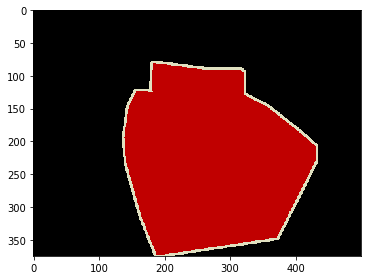

In [21]:
io.imshow(img)

In [22]:
data=img
idx = (data[:, :, 0] * 256 + data[:, :, 1]) * 256 + data[:, :, 2]

In [23]:
np.unique(idx)

array([    0, 57536], dtype=uint16)

In [24]:
data[200,200,:]

array([192,   0,   0], dtype=uint8)

问题出在data里面有一个像素点的颜色是[192,0,0]，所以np.unique(idx)里面应该有一个192*256*256的值，但是却没有这个值

In [29]:
#因为原来是'uint8'位,在做下面的计算时就溢出了，转换为'uint32'位就正常了
data=data.astype('uint32')
idx = (data[:, :, 0] * 256 + data[:, :, 1]) * 256 + data[:, :, 2]

In [30]:
np.unique(idx)

array([       0, 12582912, 14737600], dtype=uint32)

#### 随机种子
random生成的随机种子既可以给random数用，ye

In [2]:
import random
import numpy as np
a=np.arange(10)
b=np.arange(10)

random.seed(1)
random.shuffle(a)
random.seed(1)
random.shuffle(b)
print(a)
print(b)

[6 8 9 7 5 3 0 4 1 2]
[6 8 9 7 5 3 0 4 1 2]


In [3]:
import random
import numpy as np
a=np.arange(10)
b=np.arange(10)

random.seed(1)
np.random.shuffle(a)
random.seed(1)
np.random.shuffle(b)
print(a)
print(b)

[3 6 7 4 8 2 5 0 1 9]
[4 9 1 3 7 8 5 2 6 0]


In [4]:
import random
import numpy as np
a=np.arange(10)
b=np.arange(10)

np.random.seed(1)
np.random.shuffle(a)
np.random.seed(1)
np.random.shuffle(b)
print(a)
print(b)

[2 9 6 4 0 3 1 7 8 5]
[2 9 6 4 0 3 1 7 8 5]
